<a href="https://colab.research.google.com/github/ruthwick-2484/2024_stat_ml_assignment/blob/main/stml__project_2484_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/sample_data/Maternal Health Risk Data Set.csv')
data.head()

In [ ]:
target=data['RiskLevel']
target.head()

In [ ]:
x=data.drop(['RiskLevel'],axis=1)
x.head()

In [ ]:
x.isnull().sum()

In [ ]:
x=x.replace({'CL0':'0','CL1':'1','CL2':'2','CL3':'3','CL4':'4','CL5':'5','CL6':'6'})
x

In [ ]:
x.head()

In [ ]:
x.shape

(1014, 6)

Before Resampling data

In [ ]:
x.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64


In [ ]:
print(x)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [ ]:
for col in x.columns:
  if x[col].dtype == 'object':
    try:
      x[col] = x[col].astype('int64')
    except ValueError:
      x[col] = x[col].astype('float64').astype('int64')

In [ ]:
print(x)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [ ]:
x.dtypes

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.7 KB


In [ ]:
x.describe()

In [ ]:
x.corr()

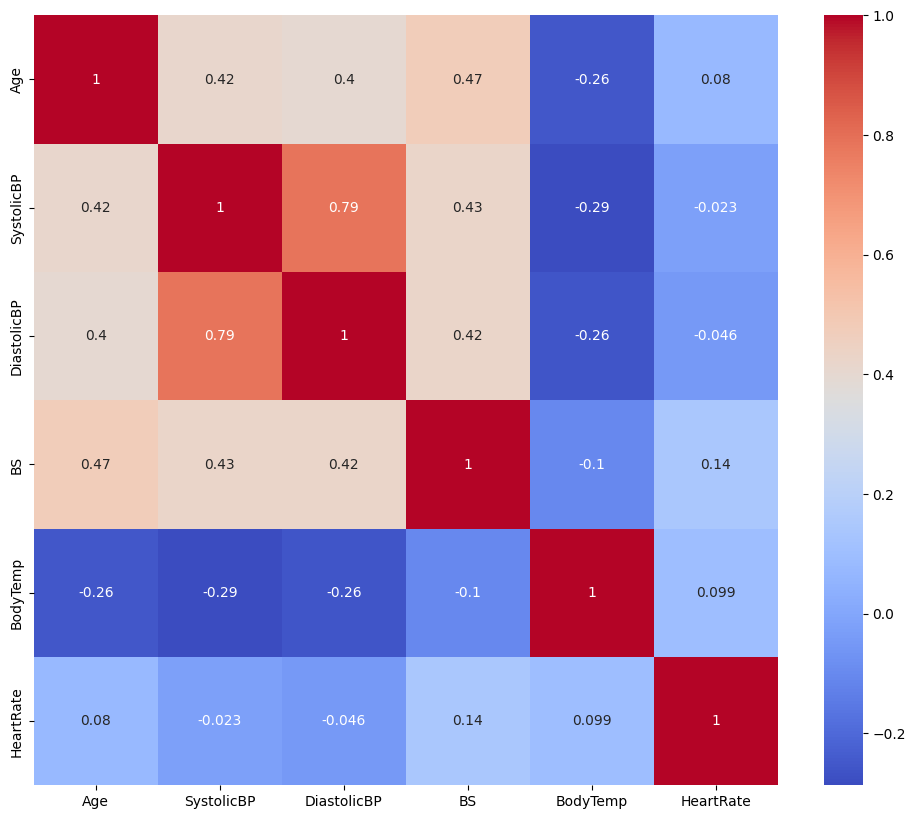

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
target.value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1014 entries, 0 to 1013
Series name: RiskLevel
Non-Null Count  Dtype 
--------------  ----- 
1014 non-null   object
dtypes: object(1)
memory usage: 8.0+ KB


In [ ]:
target.describe()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.2,random_state=42)

In [ ]:
x_train

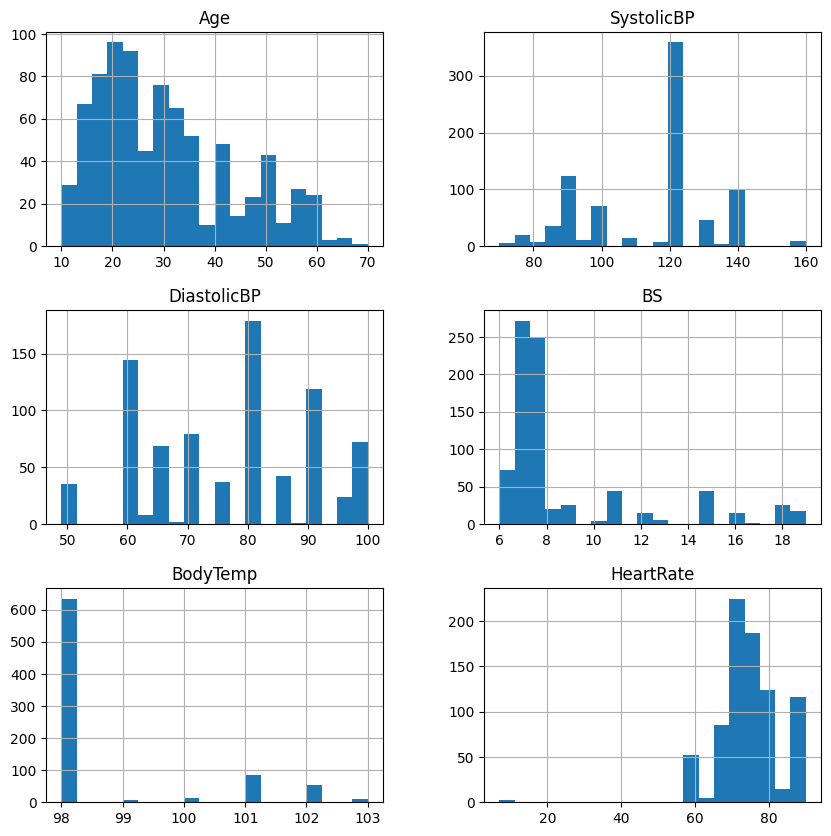

In [ ]:
x_train.hist(bins=20, figsize=(10,10))
plt.show()

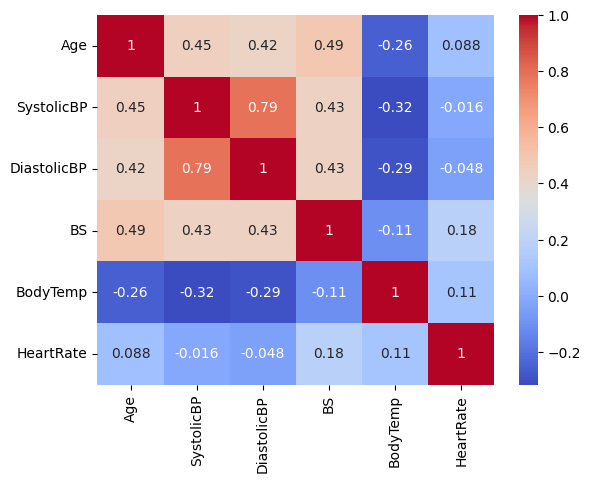

In [ ]:
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')
plt.show()

Perceptron

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,yp)
print(cm)

[[17 30  0]
 [ 0 80  0]
 [ 3 73  0]]


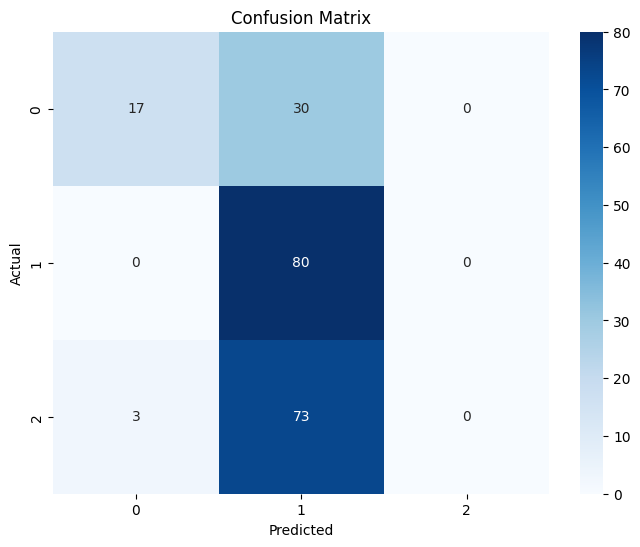

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

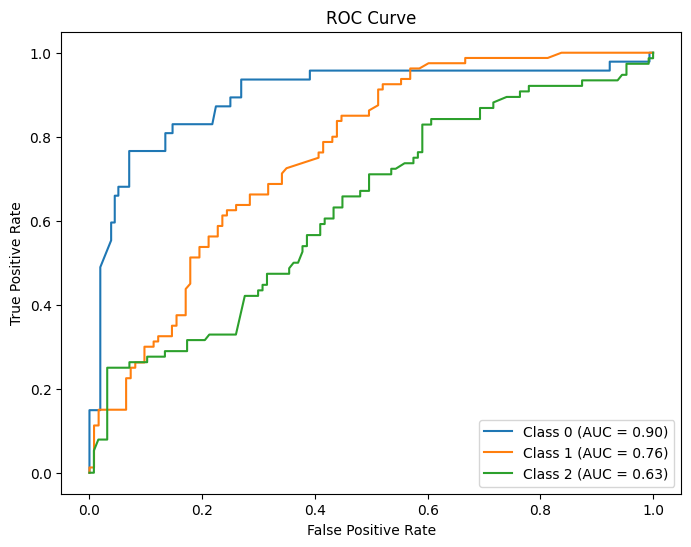

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
y_scores = pm.decision_function(x_test)

# Binarize the output for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

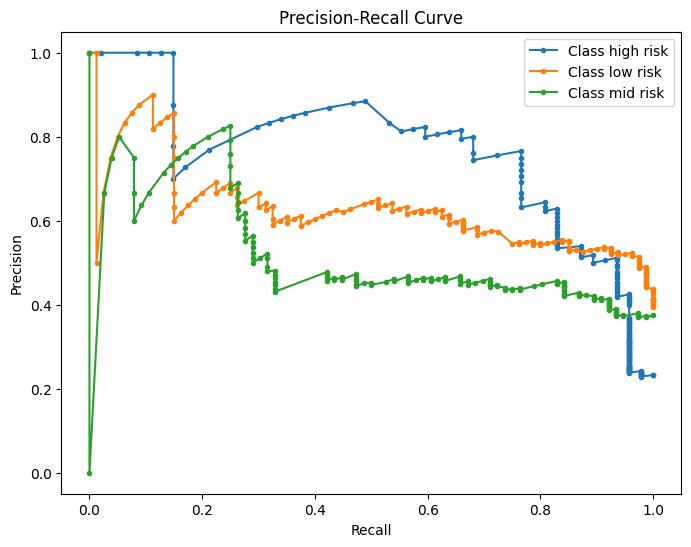

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
y_scores = pm.decision_function(x_test)

# Binarize the test labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Plot Precision-Recall Curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])  # Use y_scores
    plt.plot(recall, precision, marker='.', label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.85      0.36      0.51        47
    low risk       0.44      1.00      0.61        80
    mid risk       0.00      0.00      0.00        76

    accuracy                           0.48       203
   macro avg       0.43      0.45      0.37       203
weighted avg       0.37      0.48      0.36       203



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
accuracy_perceptron = accuracy_score(y_test,yp)
print(accuracy_perceptron)

0.47783251231527096


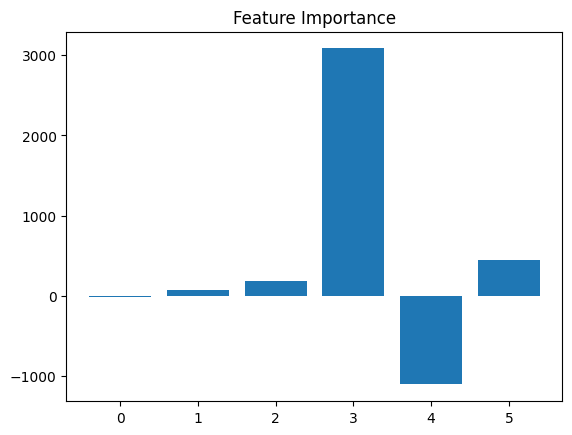

In [ ]:
importance = pm.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yp = lr.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[34 11  2]
 [ 1 72  7]
 [ 7 47 22]]


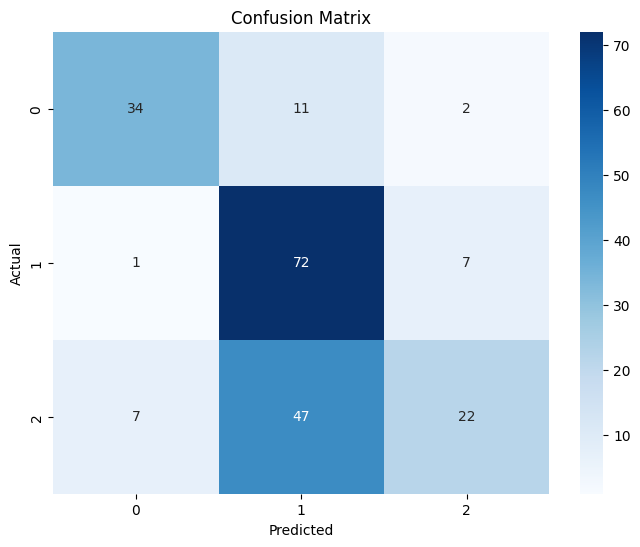

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

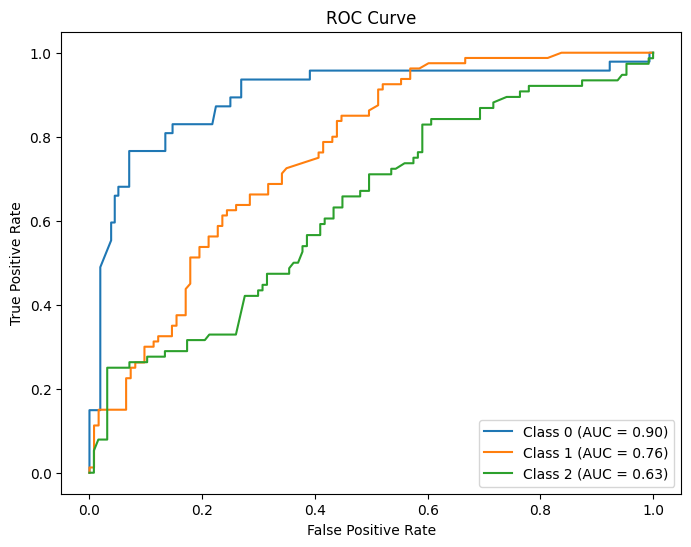

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_scores = pm.decision_function(x_test)

# Binarize the output for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

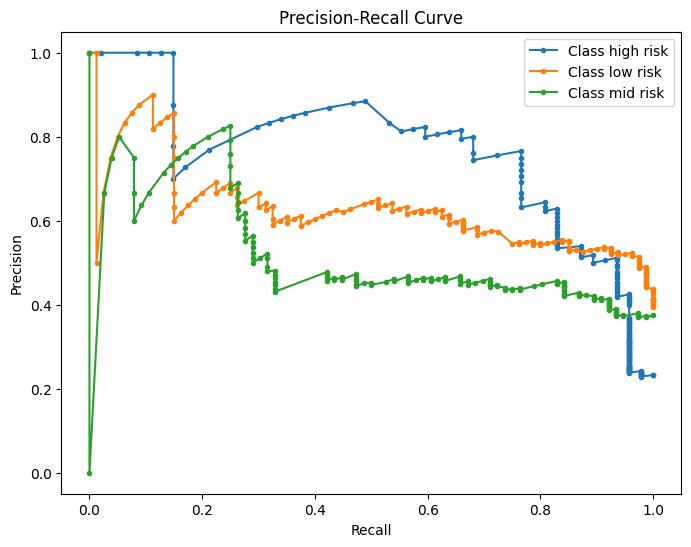

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
y_scores = pm.decision_function(x_test)

# Binarize the test labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Plot Precision-Recall Curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])  # Use y_scores
    plt.plot(recall, precision, marker='.', label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

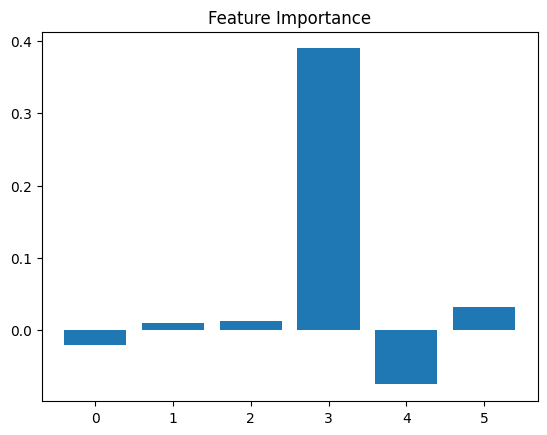

In [ ]:
importance = lr.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.81      0.72      0.76        47
    low risk       0.55      0.90      0.69        80
    mid risk       0.71      0.29      0.41        76

    accuracy                           0.63       203
   macro avg       0.69      0.64      0.62       203
weighted avg       0.67      0.63      0.60       203



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.6305418719211823


In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[28 12  7]
 [ 1 74  5]
 [ 2 55 19]]


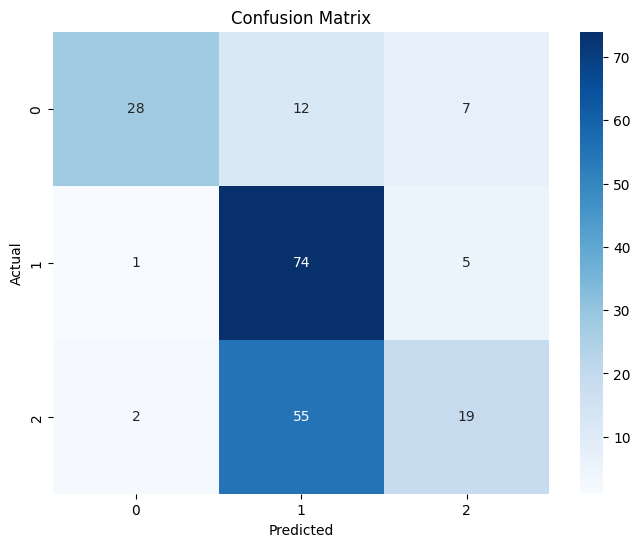

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

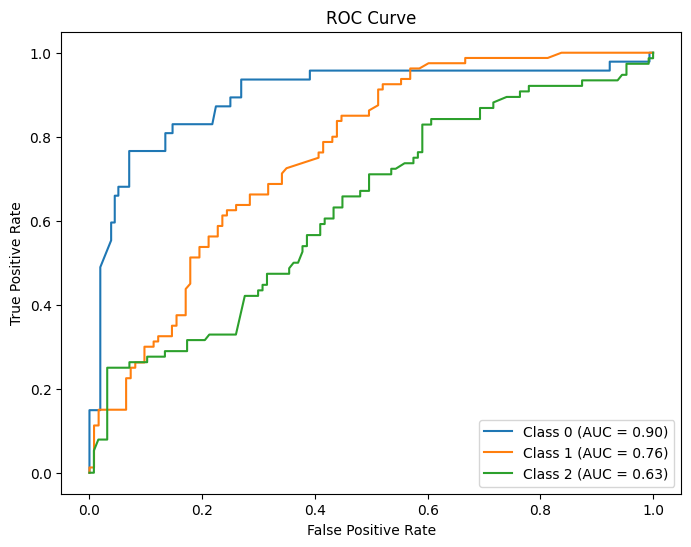

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_scores = pm.decision_function(x_test)

# Binarize the output for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

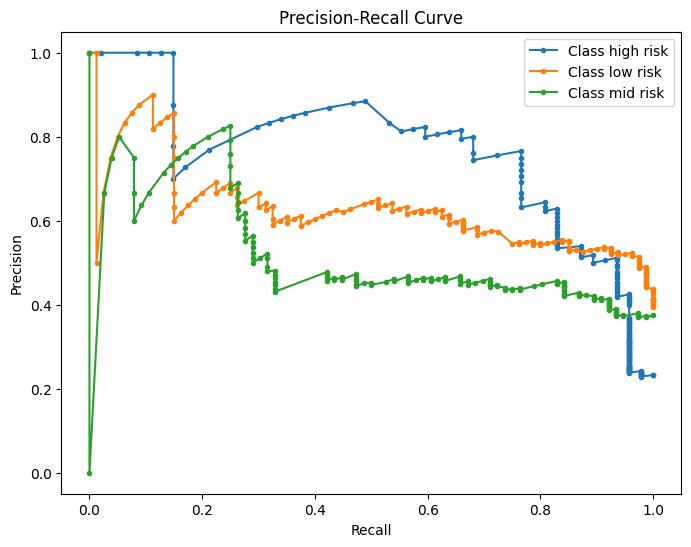

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
y_scores = pm.decision_function(x_test)

# Binarize the test labels
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Plot Precision-Recall Curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])  # Use y_scores
    plt.plot(recall, precision, marker='.', label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.90      0.60      0.72        47
    low risk       0.52      0.93      0.67        80
    mid risk       0.61      0.25      0.36        76

    accuracy                           0.60       203
   macro avg       0.68      0.59      0.58       203
weighted avg       0.65      0.60      0.56       203



In [ ]:
accuracy_svc = accuracy_score(y_test,yp)
print(accuracy_svc)

0.5960591133004927


After resampling data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,Y= smote.fit_resample(x,target)

In [ ]:
Y.value_counts()

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1218 entries, 0 to 1217
Series name: RiskLevel
Non-Null Count  Dtype 
--------------  ----- 
1218 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


In [ ]:
Y.describe()

,RiskLevel
count,1218
unique,3
top,high risk
freq,406


Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
x_train

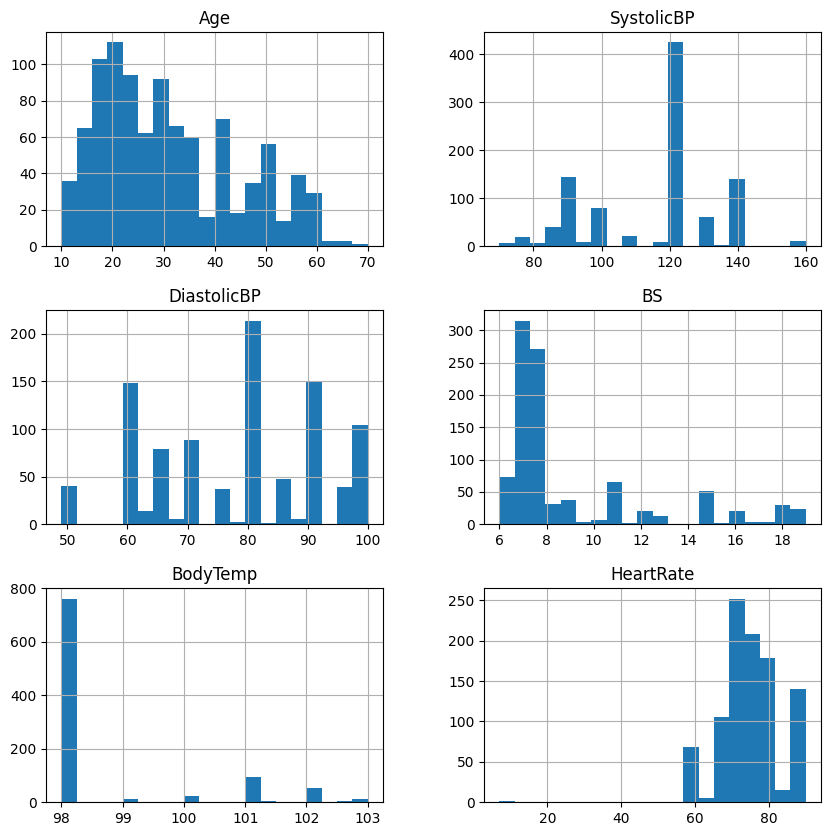

In [ ]:
x_train.hist(bins=20, figsize=(10,10))
plt.show()

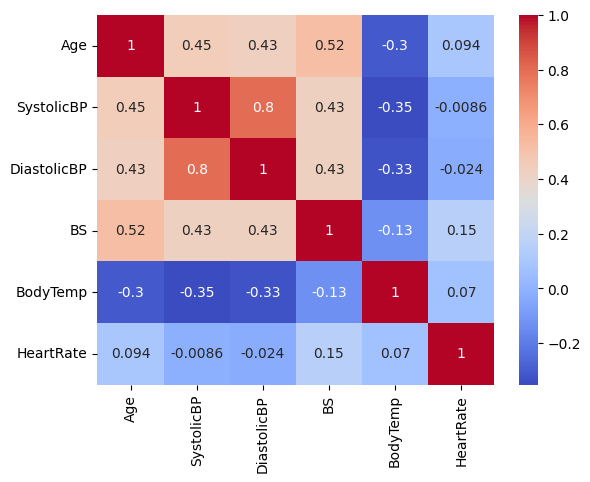

In [ ]:
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,yp)
print(cm)

[[73  0  0]
 [87  0  0]
 [84  0  0]]


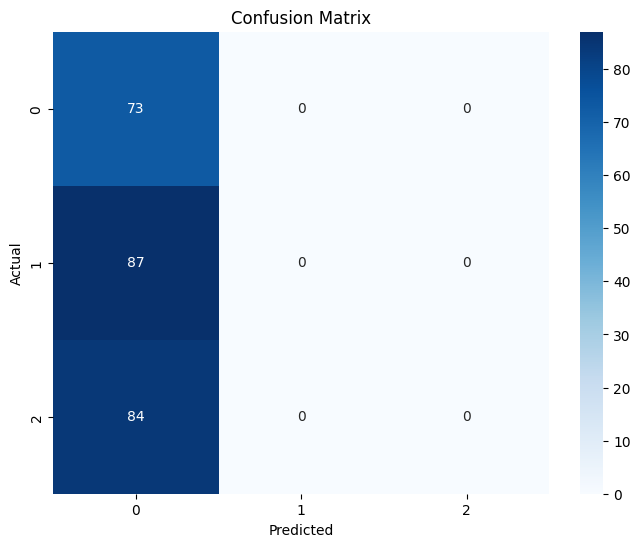

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.30      1.00      0.46        73
    low risk       0.00      0.00      0.00        87
    mid risk       0.00      0.00      0.00        84

    accuracy                           0.30       244
   macro avg       0.10      0.33      0.15       244
weighted avg       0.09      0.30      0.14       244



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
accuracy_perceptron = accuracy_score(y_test,yp)
print(accuracy_perceptron)

0.29918032786885246


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yp = lr.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[51 10 12]
 [ 4 57 26]
 [ 5 35 44]]


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.85      0.70      0.77        73
    low risk       0.56      0.66      0.60        87
    mid risk       0.54      0.52      0.53        84

    accuracy                           0.62       244
   macro avg       0.65      0.63      0.63       244
weighted avg       0.64      0.62      0.63       244



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.6229508196721312


In [ ]:
yp = lr.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[51 10 12]
 [ 4 57 26]
 [ 5 35 44]]


In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.85      0.70      0.77        73
    low risk       0.56      0.66      0.60        87
    mid risk       0.54      0.52      0.53        84

    accuracy                           0.62       244
   macro avg       0.65      0.63      0.63       244
weighted avg       0.64      0.62      0.63       244



In [ ]:
accuracy_logistic=accuracy_score(y_test,yp)
print(accuracy_logistic)

0.6229508196721312


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, yp)
print(cm)

[[51 13  9]
 [ 8 43 36]
 [ 6 25 53]]


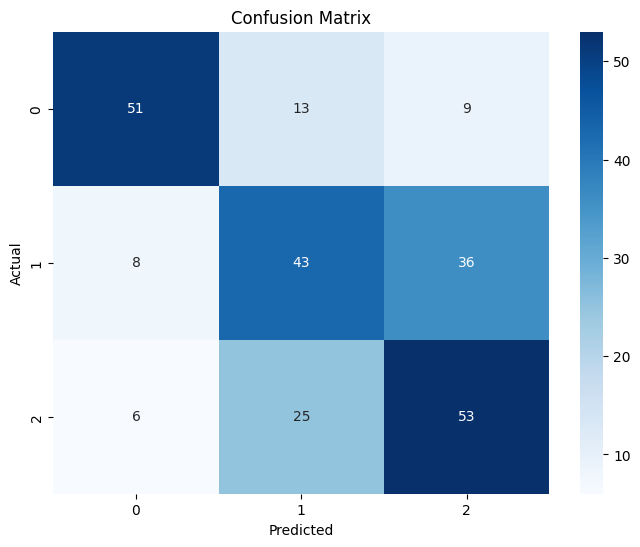

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.78      0.70      0.74        73
    low risk       0.53      0.49      0.51        87
    mid risk       0.54      0.63      0.58        84

    accuracy                           0.60       244
   macro avg       0.62      0.61      0.61       244
weighted avg       0.61      0.60      0.60       244



In [ ]:
accuracy_svc = accuracy_score(y_test,yp)
print(accuracy_svc)

0.6024590163934426


Boot Strapping

In [ ]:
from sklearn.utils import resample
def bootstrapping(x_train,y_train):
    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True, n_samples=len(x_train), random_state=42)
    return x_train_boot,y_train_boot

In [ ]:
x_train_boot,y_train_boot= bootstrapping(x_train,y_train)

Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [ ]:
yp=pm.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[73  0  0]
 [87  0  0]
 [84  0  0]]


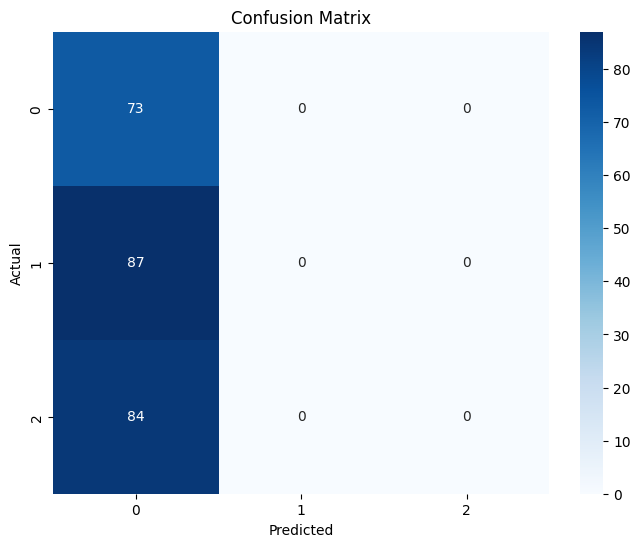

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.30      1.00      0.46        73
    low risk       0.00      0.00      0.00        87
    mid risk       0.00      0.00      0.00        84

    accuracy                           0.30       244
   macro avg       0.10      0.33      0.15       244
weighted avg       0.09      0.30      0.14       244



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(accuracy_score(y_test,yp))

0.29918032786885246


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yp = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[51 10 12]
 [ 4 57 26]
 [ 5 35 44]]


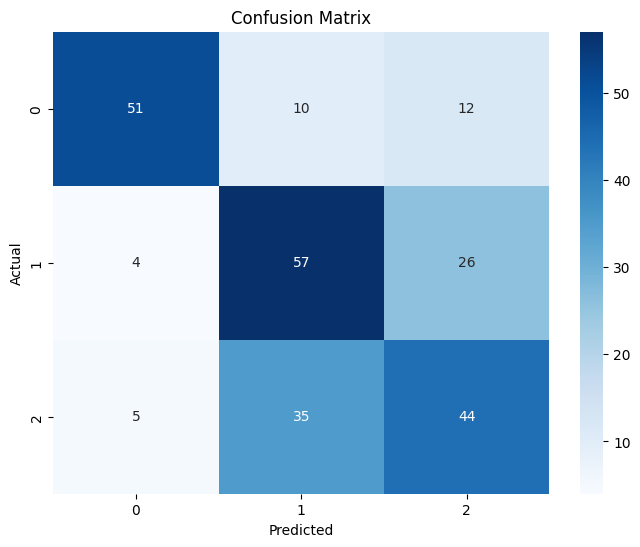

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.85      0.70      0.77        73
    low risk       0.56      0.66      0.60        87
    mid risk       0.54      0.52      0.53        84

    accuracy                           0.62       244
   macro avg       0.65      0.63      0.63       244
weighted avg       0.64      0.62      0.63       244



In [ ]:
print(accuracy_score(y_test,yp))

0.6229508196721312


Support vector machine

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
yp=sv.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,yp))

[[51 13  9]
 [ 8 43 36]
 [ 6 25 53]]


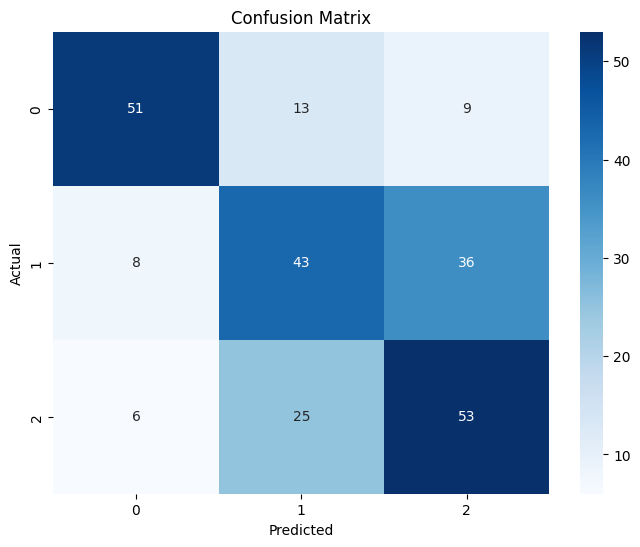

In [ ]:
cm = confusion_matrix(y_test, yp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

   high risk       0.78      0.70      0.74        73
    low risk       0.53      0.49      0.51        87
    mid risk       0.54      0.63      0.58        84

    accuracy                           0.60       244
   macro avg       0.62      0.61      0.61       244
weighted avg       0.61      0.60      0.60       244



In [ ]:
print(accuracy_score(y_test,yp))

0.6024590163934426


Comparison

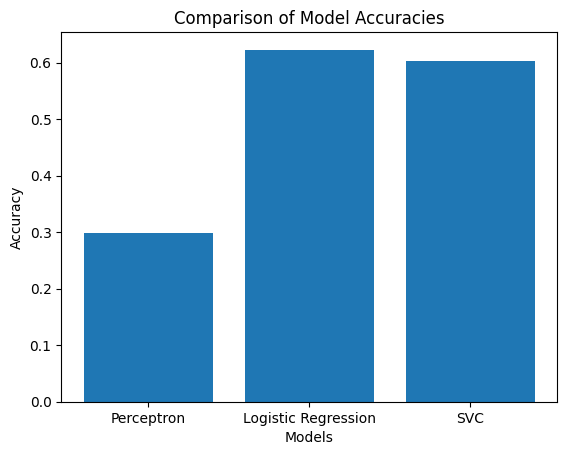

In [ ]:
model_names = ['Perceptron', 'Logistic Regression', 'SVC',]
accuracies = [accuracy_perceptron, accuracy_logistic, accuracy_svc]

plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()